# Exploratory Data Analysis (EDA) & Data Cleaning

This notebook covers the initial exploration of the Loan Default dataset.
We will analyze:

1. Data Structure & Missing Values
2. Variable Analysis (Target, Categorical, Numerical)

## 1. Data Structure & Missing Values

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Configuration for plots
plt.style.use('seaborn-v0_8-whitegrid')
pd.set_option('display.max_columns', None)

In [2]:
# Load the dataset
data_path = Path("data/raw/Loan_Default.csv")

if not data_path.exists():
    # Fallback if running from a different root
    data_path = Path("../data/raw/Loan_Default.csv")

df = pd.read_csv(data_path)
print(f"Data Loaded. Shape: {df.shape}")
df.head()

Data Loaded. Shape: (148670, 34)


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_charges            10

In [4]:
# Check for missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Count': missing, 'Percent': missing_percent})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Percent', ascending=False)

print("Features with Missing Values:")
display(missing_df)

Features with Missing Values:


,Missing Count,Percent
Upfront_charges,39642,26.664425
Interest_rate_spread,36639,24.644515
rate_of_interest,36439,24.509989
dtir1,24121,16.224524
property_value,15098,10.155378
LTV,15098,10.155378
income,9150,6.154571
loan_limit,3344,2.249277
approv_in_adv,908,0.610749
age,200,0.134526


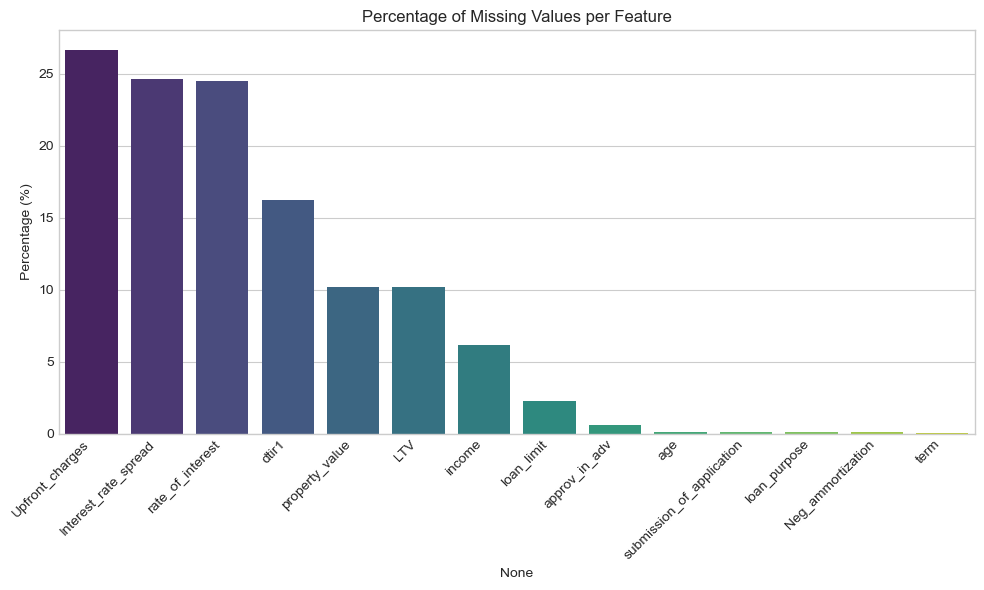

In [5]:
# Visualize missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_df.index, y='Percent', data=missing_df, hue=missing_df.index, legend=False, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Percentage of Missing Values per Feature')
plt.ylabel('Percentage (%)')
plt.tight_layout()
plt.show()

## 2. Variable Analysis

### 2.1. Target Variable Analysis (`Status`)

`Status` is our target variable:
*   0 = Non-Default
*   1 = Default

Target Distribution:
Status
0    112031
1     36639
Name: count, dtype: int64

Percentage:
Status
0    75.355485
1    24.644515
Name: proportion, dtype: float64


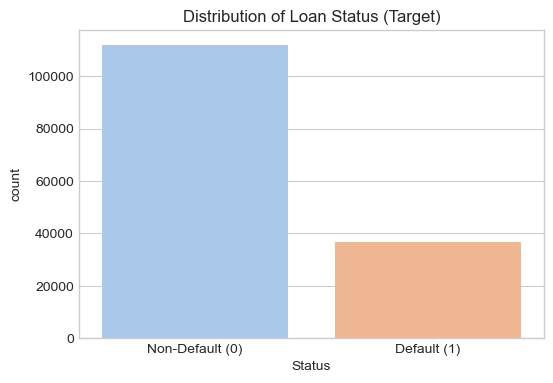

In [6]:
target_counts = df['Status'].value_counts()
target_percent = df['Status'].value_counts(normalize=True) * 100

print("Target Distribution:")
print(target_counts)
print("\nPercentage:")
print(target_percent)

plt.figure(figsize=(6, 4))
sns.countplot(x='Status', data=df, hue='Status', legend=False, palette='pastel')
plt.title('Distribution of Loan Status (Target)')
plt.xticks([0, 1], ['Non-Default (0)', 'Default (1)'])
plt.show()

### 2.2. Categorical Feature Analysis

We investigate key categorical features and their relationship with the target.

In [7]:
# Function to plot categorical feature vs Target
def plot_cat_vs_target(df, col, title=None, rotation=0):
    plt.figure(figsize=(10, 5))
    
    # Calculate default rate per category
    temp = df.groupby(col)['Status'].mean().sort_values(ascending=False) * 100
    
    sns.barplot(x=temp.index, y=temp.values, hue=temp.index, legend=False, palette='Reds_r')
    plt.title(title if title else f'Default Rate by {col}')
    plt.ylabel('Default Rate (%)')
    plt.xticks(rotation=rotation)
    plt.show()

#### Credit Type Analysis

> While the dataset documentation does not explicitly define the values within the `credit_type` column, our external research identifies them as major credit reporting agencies. Preliminary analysis suggests this feature is strongly correlated with loan default outcomes, indicating that the source of the credit report may reflect the risk profile of the borrower. The definitions are as follows:
>
> * **EXP (Experian):** A multinational consumer credit reporting company headquartered in Dublin, Ireland. It is one of the 'Big Three' credit bureaus in the United States.
> * **EQUI (Equifax):** Another member of the 'Big Three' agencies, headquartered in Atlanta, Georgia, specializing in global consumer credit reporting.
> * **CRIF (Centrale Rischi Finanziari):** A global company specializing in credit bureau and business information systems, headquartered in Bologna, Italy, with a strong presence in Europe and Asia.
> * **CIB (Credit Information Bureau):** Likely refers to a generic Credit Information Bureau or a specific regional credit institution (e.g., Credit Information Bureau (India) Limited) used to assess borrower creditworthiness.

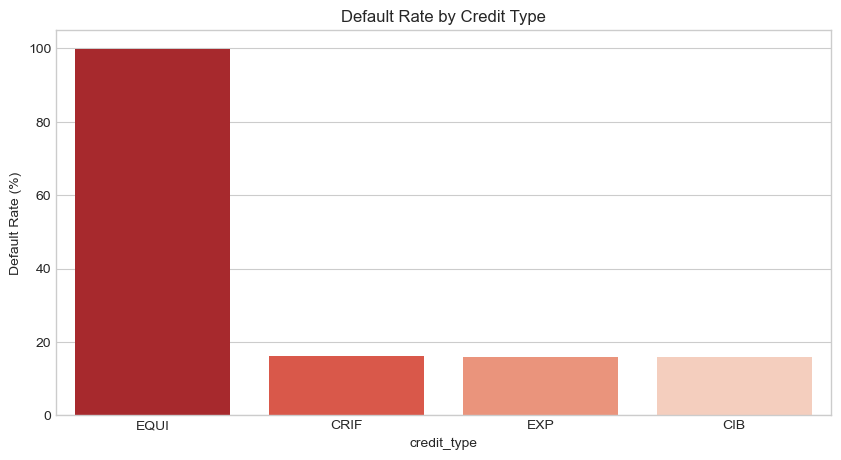

In [8]:
plot_cat_vs_target(df, 'credit_type', title='Default Rate by Credit Type')

In [9]:
# Verify the count of EQUI
print("Counts for Credit Type:")
print(df['credit_type'].value_counts())
print("\nDefault Rate for EQUI:")
equi_defaults = df[df['credit_type'] == 'EQUI']['Status'].mean()
print(f"{equi_defaults:.4%}")

Counts for Credit Type:
credit_type
CIB     48152
CRIF    43901
EXP     41319
EQUI    15298
Name: count, dtype: int64

Default Rate for EQUI:
99.9935%


#### Age Analysis

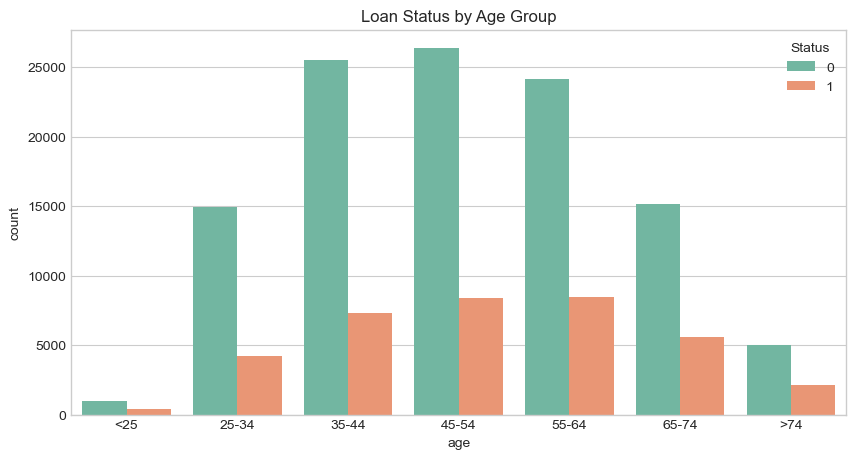

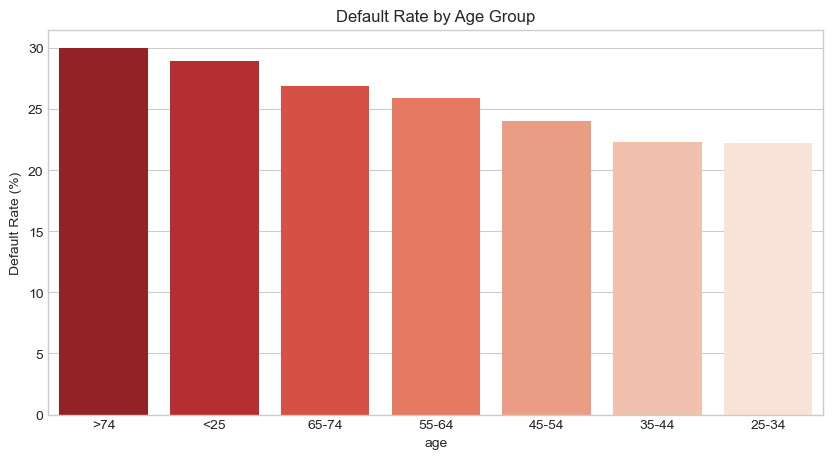

In [10]:
# Age is a string (e.g., "25-34"). Let's check the unique values and order them.
age_order = ['<25', '25-34', '35-44', '45-54', '55-64', '65-74', '>74']
# Filter out any weird values if necessary, or just plot what we have
valid_ages = [x for x in age_order if x in df['age'].unique()]

plt.figure(figsize=(10, 5))
sns.countplot(x='age', data=df, order=valid_ages, hue='Status', palette='Set2')
plt.title('Loan Status by Age Group')
plt.show()

plot_cat_vs_target(df, 'age', title='Default Rate by Age Group')

#### Region Analysis

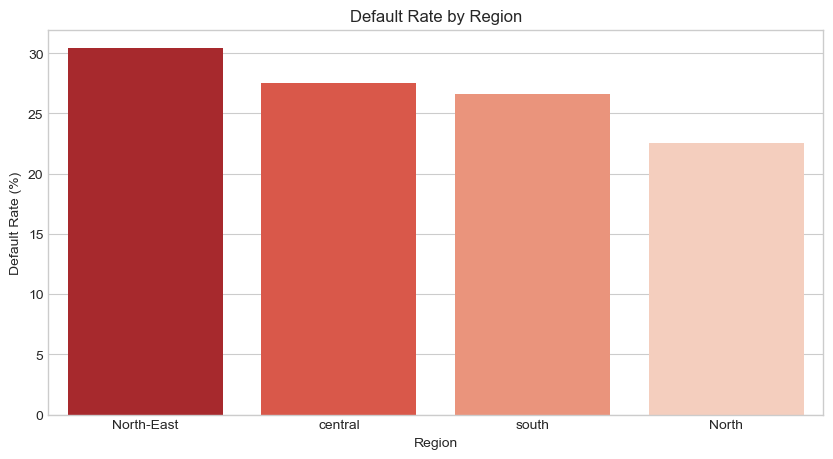

In [11]:
plot_cat_vs_target(df, 'Region', title='Default Rate by Region')

### 2.3. Numerical Feature Analysis

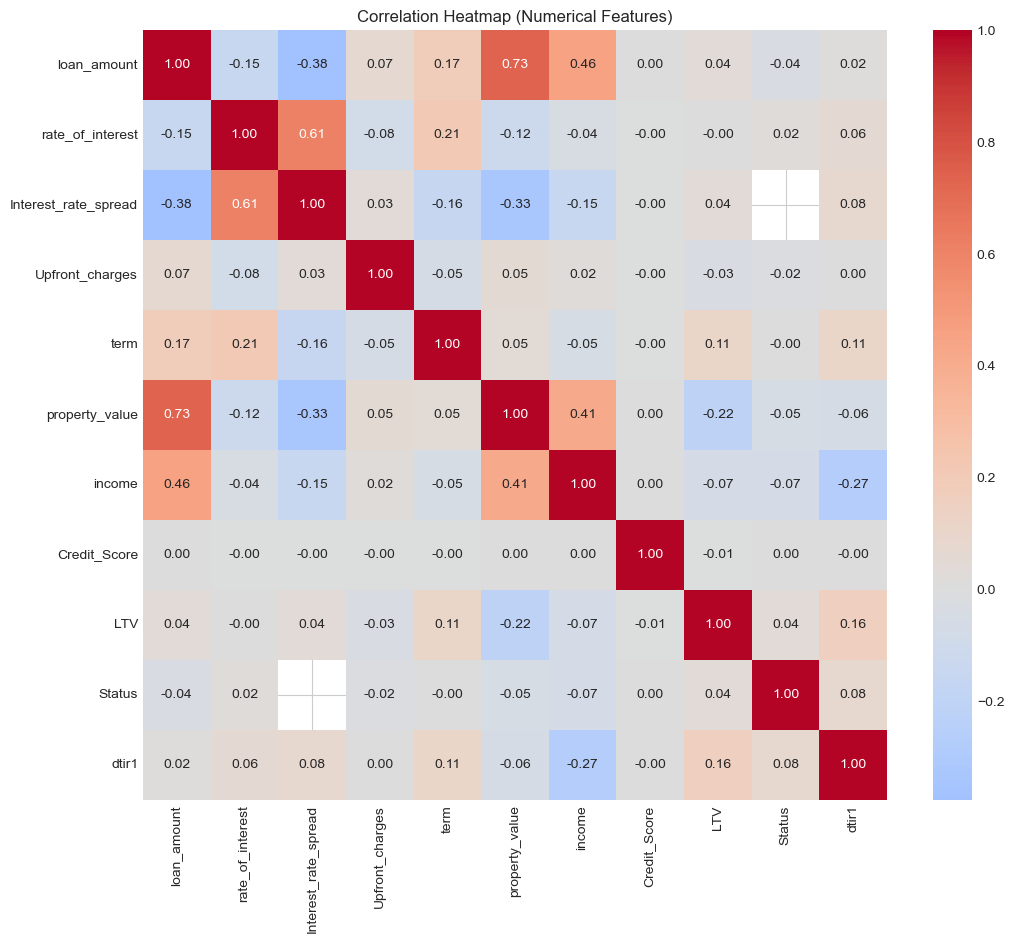

Top Correlations with Status:
Status                  1.000000
dtir1                   0.078083
LTV                     0.038895
rate_of_interest        0.022957
Credit_Score            0.004004
term                   -0.000240
Upfront_charges        -0.019138
loan_amount            -0.036825
property_value         -0.048864
income                 -0.065119
Interest_rate_spread         NaN
Name: Status, dtype: float64


In [12]:
# Select numerical columns
num_cols = df.select_dtypes(include=['number']).columns
# Drop ID and year (irrelevant)
num_cols = [c for c in num_cols if c not in ['ID', 'year']]

# Correlation Matrix
corr = df[num_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlation Heatmap (Numerical Features)')
plt.show()

print("Top Correlations with Status:")
print(corr['Status'].sort_values(ascending=False))

In [13]:
# Checking: in the rows where `Interest_rate_spread` is not null, what are the values of Status?
check_subset = df[df['Interest_rate_spread'].notnull()]['Status']

print("Distribution of `Status` in the subset where `Interest_rate_spread` is not null:")
print(check_subset.value_counts())

print("\nSTD of `Status` in the subset where `Interest_rate_spread` is not null:", check_subset.std())
print("This explains why the correlation between `Interest_rate_spread` and `Status` is NaN.")
print("Implication: This feature is likely a data leakage or a deterministic rule (only present for specific loan outcomes).")

Distribution of `Status` in the subset where `Interest_rate_spread` is not null:
Status
0    112031
Name: count, dtype: int64

STD of `Status` in the subset where `Interest_rate_spread` is not null: 0.0
This explains why the correlation between `Interest_rate_spread` and `Status` is NaN.
Implication: This feature is likely a data leakage or a deterministic rule (only present for specific loan outcomes).


#### Debt-to-Income Ratio (dtir1) vs Status

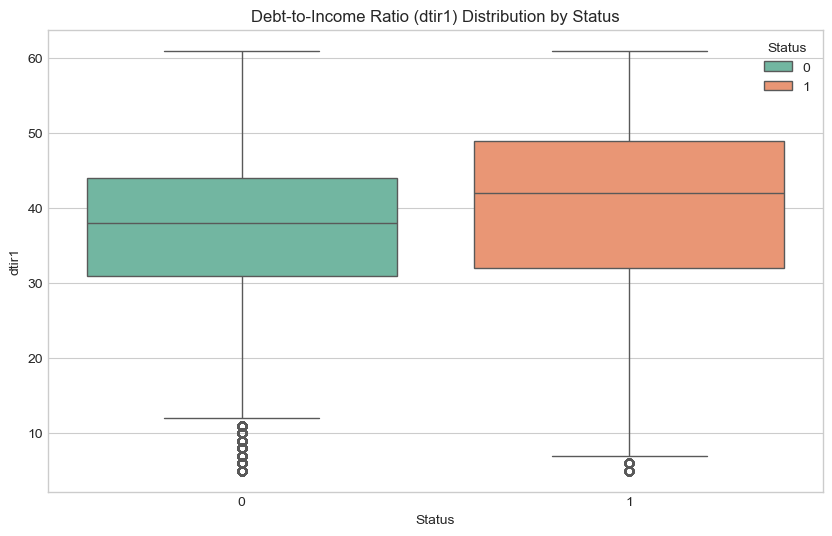

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='dtir1', data=df, hue='Status', palette='Set2')
plt.title('Debt-to-Income Ratio (dtir1) Distribution by Status')
plt.show()

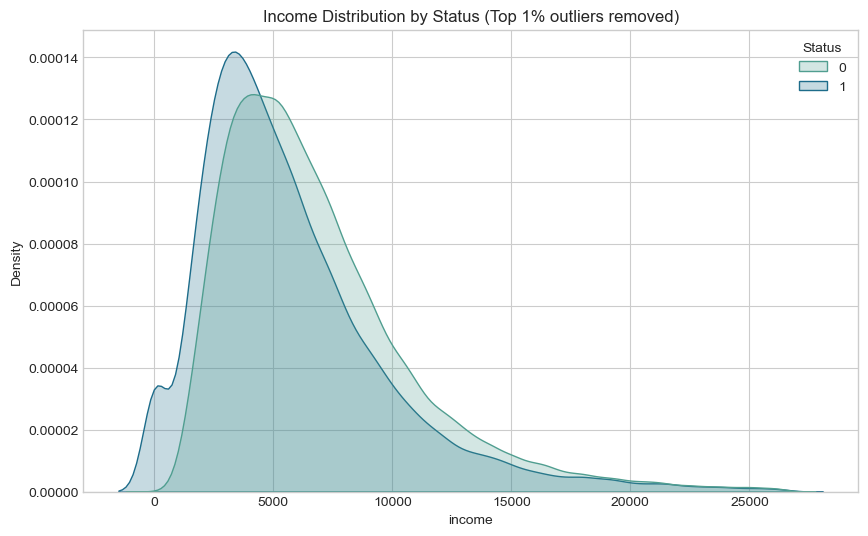

In [15]:
# Capping income for visualization because of outliers
q99 = df['income'].quantile(0.99)
temp_df = df[df['income'] < q99]

plt.figure(figsize=(10, 6))
sns.kdeplot(data=temp_df, x='income', hue='Status', fill=True, common_norm=False, palette='crest')
plt.title('Income Distribution by Status (Top 1% outliers removed)')
plt.show()